In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
df= pd.read_csv('synthetic_insurance_data.csv')
df

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,Single,0,1-5 years,50,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100
9996,18,0,Married,86,1-5 years,50,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100
9997,29,0,Married,86,<1 year,100,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100
9998,47,0,Single,0,<1 year,100,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [30]:
df.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,...,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,39.991700,0.159300,42.131400,47.625000,0.497200,36.780000,-79.860000,2219.571400,0.199900,0.305100,...,30.110000,15.478000,0.576700,5.022900,1.996900,1.996900,46.07320,714.253400,-11.320000,64.325000
std,14.050358,0.365974,42.993376,34.354438,0.716131,65.910288,97.955806,148.521132,0.399945,0.460473,...,33.689782,8.677975,0.494107,2.238231,1.415588,0.817409,45.44845,49.749487,48.704156,39.232618
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1800.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,530.000000,-50.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,2100.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,3.000000,1.000000,1.000000,6.00000,681.000000,-50.000000,50.000000
50%,39.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2236.000000,0.000000,0.000000,...,50.000000,16.000000,1.000000,5.000000,2.000000,2.000000,12.00000,715.000000,-50.000000,50.000000
75%,50.000000,0.000000,86.000000,50.000000,1.000000,50.000000,0.000000,2336.000000,0.000000,1.000000,...,50.000000,23.000000,1.000000,6.000000,3.000000,3.000000,99.00000,748.000000,50.000000,100.000000
max,90.000000,1.000000,86.000000,100.000000,5.000000,800.000000,0.000000,2936.000000,1.000000,1.000000,...,150.000000,30.000000,1.000000,16.000000,9.000000,3.000000,99.00000,850.000000,50.000000,100.000000


In [31]:
df.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [32]:
df.shape

(10000, 27)

In [33]:
# VISUALISATION

import matplotlib.pyplot as plt
import pandas as pd

Policy_Type_class= df["Source_of_Lead"].value_counts() #Claims_Severity, 
Policy_Type_class

Online      6035
Agent       3004
Referral     961
Name: Source_of_Lead, dtype: int64

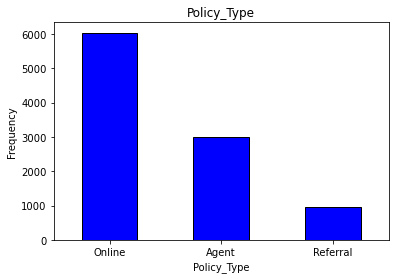

In [34]:
# BAR CHART
Policy_Type_class.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Policy_Type')

plt.xlabel('Policy_Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

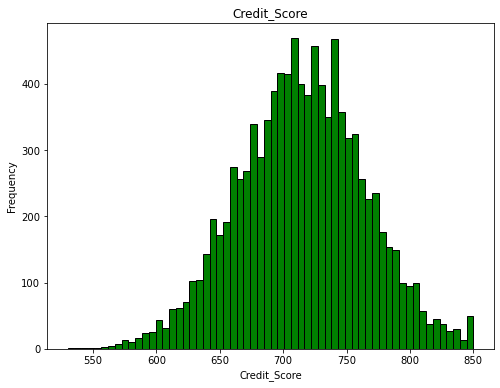

In [35]:
# Histogram

plt.figure(figsize=(8,6))

plt.hist(df['Credit_Score'], bins= 60, color='green', edgecolor='black')
plt.title('Credit_Score')
plt.xlabel('Credit_Score')
plt.ylabel('Frequency')
plt.show()

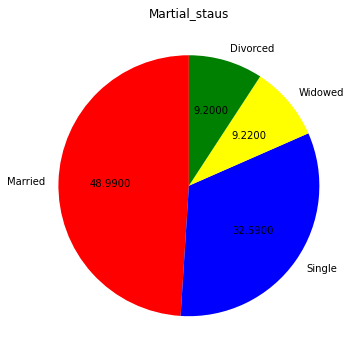

In [39]:
# pie chart

Martial_status= df['Marital_Status'].value_counts()

name=['Married','Single','Widowed','Divorced']

plt.figure(figsize=(8,6))


plt.pie(Martial_status, labels=name, autopct='%0.4f', startangle=90, colors=['red','blue','yellow','green'])
plt.title('Martial_staus')

plt.show()



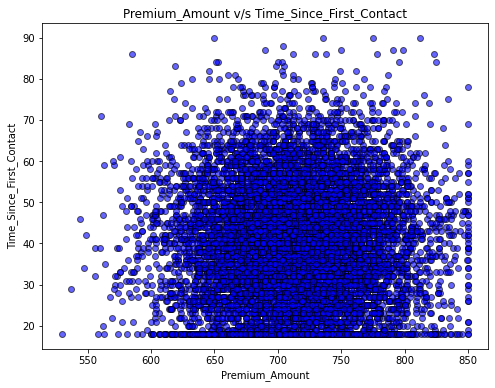

In [63]:
# Scatter plot

plt.figure(figsize=(8,6))

plt.scatter(df['Credit_Score'],df['Age'], alpha=0.6, c='blue', edgecolor='black')  # alpha is the opacity

plt.title('Premium_Amount v/s Time_Since_First_Contact')
plt.xlabel('Premium_Amount')
plt.ylabel('Time_Since_First_Contact')
plt.show()

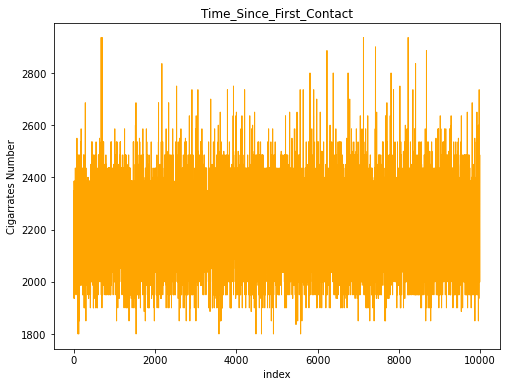

In [53]:
# Line chart


plt.figure(figsize=(8,6))
plt.plot(df.index, df['Premium_Amount'], color='orange', lw=1)

plt.title('Time_Since_First_Contact')
plt.xlabel('index')
plt.ylabel('Cigarrates Number')
plt.show()

<Figure size 1440x720 with 0 Axes>

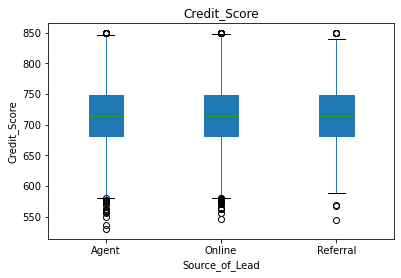

In [ ]:
# Box Plot

plt.figure(figsize=(20,10))
df.boxplot(column='Credit_Score', by= 'Source_of_Lead', grid=False, patch_artist=True)

plt.suptitle('')
plt.xlabel('Source_of_Lead')
plt.ylabel('Credit_Score')
plt.show()

In [57]:
Policy_Type_class= df["Policy_Type"].value_counts() #Claims_Severity, 
Policy_Type_class

Full Coverage     6007
Liability-Only    3993
Name: Policy_Type, dtype: int64

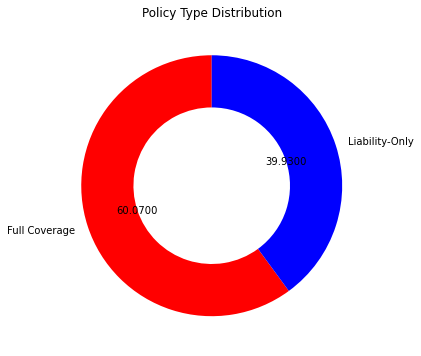

In [58]:
# Donut Chart

survival_counts= df['Policy_Type'].value_counts()

name=['Full Coverage','Liability-Only']

plt.figure(figsize=(8,6))


plt.pie(survival_counts, labels=name, autopct='%0.4f', startangle=90, colors=['red','blue'], wedgeprops=dict(width=0.4))
plt.title('Policy Type Distribution')

plt.show()